## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [42]:
# 讀取boston資料集
boston = datasets.load_boston()
    # 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)
    # 建立一個線性回歸模型 
def boston_test(i):
    lasso = linear_model.Lasso(alpha=i)
    # 將訓練資料丟進去模型訓練
    lasso.fit(x_train, y_train)
    # 將測試資料丟進模型得到預測結果
    y_pred = lasso.predict(x_test)
    y_pred_train = lasso.predict(x_train)
    training_loss.append(mean_squared_error(y_train, y_pred_train))
    test_loss.append(mean_squared_error(y_test, y_pred))

In [50]:
training_loss = []
test_loss = []   
for i in range(1,51):
    boston_test(i)

<ipython-input-42-8008c5f70525>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train, y_train)
/Users/tsaifeng-ren/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/tsaifeng-ren/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5115.628760049488, tolerance: 3.8525708923076913
  model = cd_fast.enet_coordinate_descent(


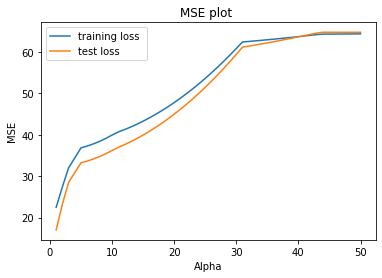

In [51]:
s = np.arange(1,51)
# plotting the line 1 points 
plt.plot(s, training_loss, label = "training loss ")
# plotting the line 2 points 
plt.plot(s, test_loss, label = "test loss ")
plt.xlabel('Alpha')
# Set the y axis label of the current axis.
plt.ylabel('MSE')
# Set a title of the current axes.
plt.title('MSE plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [24]:
# 可以看Lasso回歸模型的參數值
print('Coefficients: ', lasso.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-0.          0.02218413 -0.          0.          0.          0.
  0.         -0.          0.         -0.00937556 -0.          0.00769724
 -0.5637848 ]
Mean squared error: 36.98


In [62]:
# 讀取酒資料集
wine = datasets.load_wine()
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data,wine.target, test_size=0.2, random_state=4)
# 建立一個線性回歸模型
def wine_test(i):
    ridge = linear_model.Ridge(alpha=i)
# 將訓練資料丟進去模型訓練
    ridge.fit(x_train, y_train)
# 將測試資料丟進模型得到預測結果
    y_pred = ridge.predict(x_test)
    y_pred_train = ridge.predict(x_train)
    training_loss.append(mean_squared_error(y_train, y_pred_train))
    test_loss.append(mean_squared_error(y_test, y_pred))

In [63]:
training_loss = []
test_loss = []   
for i in range(1,51):
    boston_test(i)

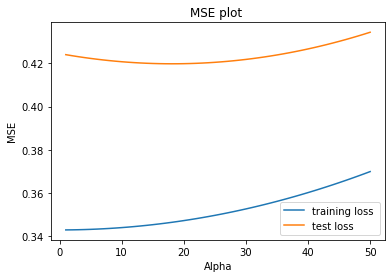

In [67]:
s = np.arange(1,51)
# plotting the line 1 points 
plt.plot(s, training_loss, label = "training loss ")
# plotting the line 2 points 
plt.plot(s, test_loss, label = "test loss ")
plt.xlabel('Alpha')
# Set the y axis label of the current axis.
plt.ylabel('MSE')
# Set a title of the current axes.
plt.title('MSE plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [65]:
# 可以看ridge回歸模型的參數值
print('Coefficients: ', ridge.coef_)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficients:  [-0.09101304  0.02399141 -0.1064664   0.0396002   0.00034535  0.00180742
 -0.26003806 -0.01195908  0.01538726  0.08656986 -0.06235294 -0.22360622
 -0.00087038]
Mean squared error: 4136524.46
